<a href="https://colab.research.google.com/github/Riyayrd/MachineLearning/blob/main/LogisticRegression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target']=cancer.target
print(df.head())
print(df.info())
print(df.describe())
print(df['target'].value_counts())
print(df.isnull().sum())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('target',axis=1)
Y=df['target']

X_train,X_test,Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=500)  # Increased max_iter for better convergence
log_reg.fit(X_train_scaled, Y_train)

# Model parameters (coefficients and intercept)
print("Model Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


Model Coefficients: [[-0.43190368 -0.38732553 -0.39343248 -0.46521006 -0.07166728  0.54016395
  -0.8014581  -1.11980408  0.23611852  0.07592093 -1.26817815  0.18887738
  -0.61058302 -0.9071857  -0.31330675  0.68249145  0.17527452 -0.3112999
   0.50042502  0.61622993 -0.87984024 -1.35060559 -0.58945273 -0.84184594
  -0.54416967  0.01611019 -0.94305313 -0.77821726 -1.20820031 -0.15741387]]
Intercept: [0.44558453]


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
Y_pred = log_reg.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



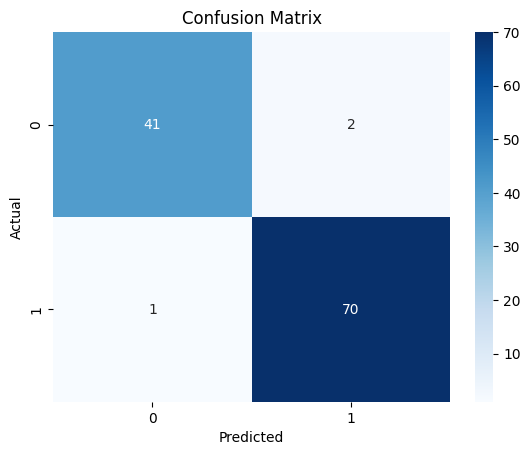

In [11]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
